In [1]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! python -m scripts.run-mace --map="example" --output_file="episode_example"

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
[02/22/25 16:28:09] INFO     INFO:__main__:Preparing map          ]8;id=156901;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=359509;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#64\64]8;;\
                             environment: example                               
                    INFO     INFO:__main__:Starting manual        ]8;id=602628;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=920239;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#69\69]8;;\
                             control                                            
pressed right
step=1, reward=0.00
pressed up
step=2, reward=0.00
pressed up
step=3, reward=0.00
pressed up
step=4, reward=0.00
pressed up
step=5, reward=0.00
pressed up
step=6, reward=0.00
pressed up
s

In [2]:
episodes = np.load("data/episode_example.npy", allow_pickle=True)
episodes.shape

(3,)

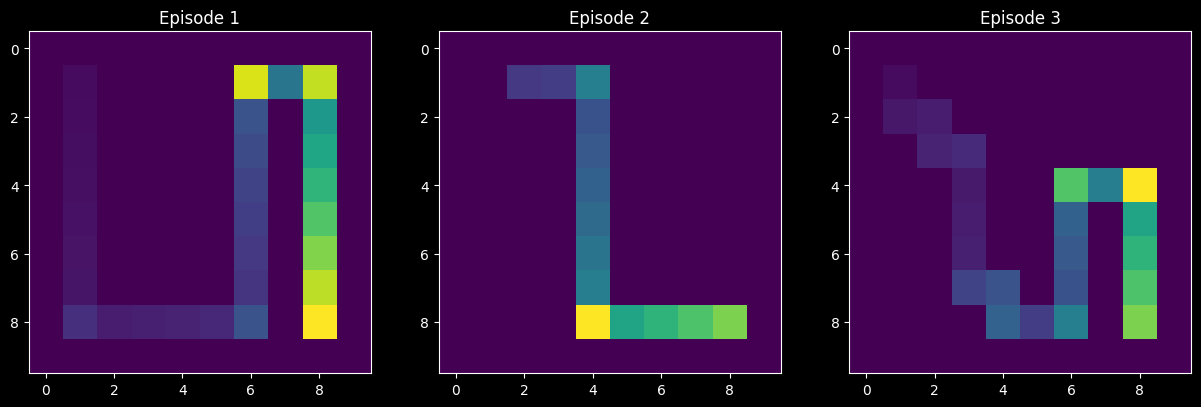

In [3]:
plt.figure(figsize=(15, 5))
for n, X in enumerate(episodes):
    plt.subplot(1, len(episodes), n + 1)
    y = ehc.sequence(X, δ=0.9)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [5]:
settings = ehc.HGMSettings(δ=0.8, τ=0.1, c=0.4)
model = ehc.HierarchicalGenerativeModel([1.0], 100, settings)

/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: divide by zero encountered in log
  Θ[k].θ = (1 - λ) * Θ[k].θ - kron_delta(ξ_i, np.log(x))  # Eq. (13)
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: invalid value encountered in log
  Θ[k].θ = (1 - λ) * Θ[k].θ - kron_delta(ξ_i, np.log(x))  # Eq. (13)


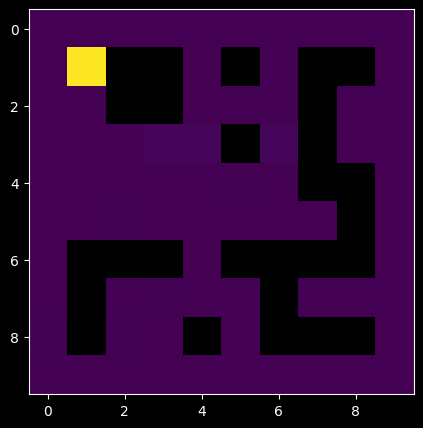

In [5]:
Θ = model.learning(episode=[e.reshape(e.shape[0], -1) for e in episodes])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(Θ[0].θ.reshape(10, 10), cmap="viridis")